In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

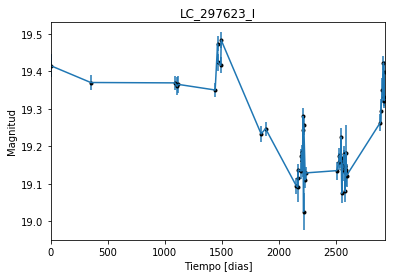

In [2]:
data = np.genfromtxt('LC_297623_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_297623_I')
plt.savefig("LC_297623_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

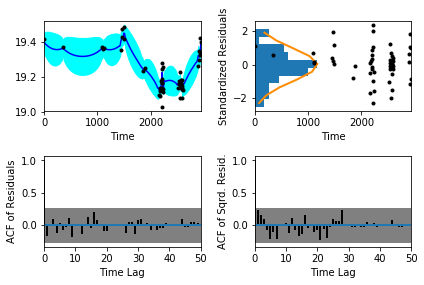

In [5]:
sample.assess_fit()


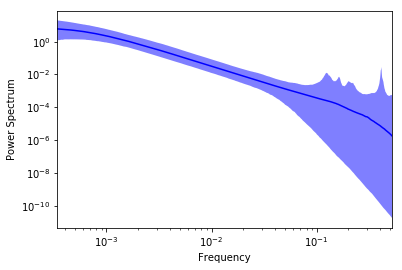

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

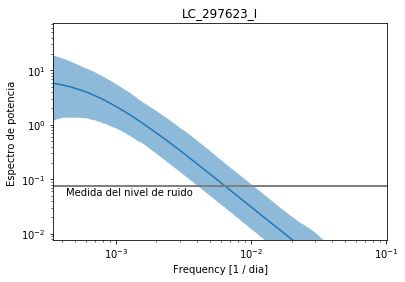

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_297623_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_297623_I')

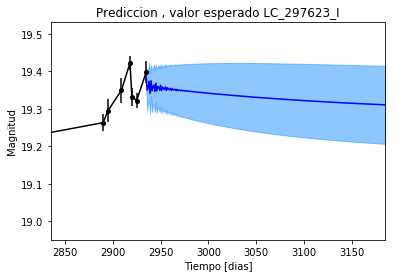

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_297623_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_297623_I')

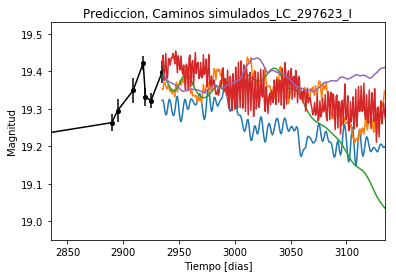

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_297623_I')

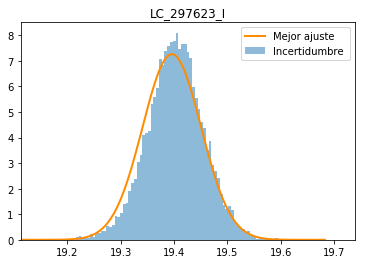

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_297623_I')
plt.savefig("Mejor_ajuste_LC_297623_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_297623_I')

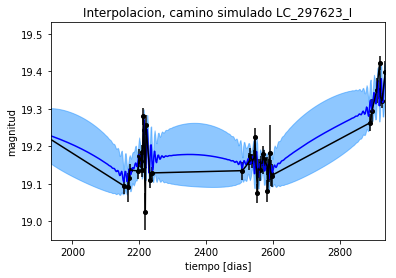

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_297623_I')

Text(0.5,1,'Interpolacion, camino simulado LC_297623_I')

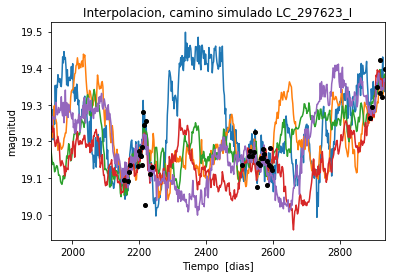

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_297623_I')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 409.006119228
Median: 0.00875309457923
Standard deviation: 0.157885713047
68% credibility interval: [ 0.0017699   0.07715473]
95% credibility interval: [  5.83596190e-04   6.33265965e-01]
99% credibility interval: [  3.80914859e-04   9.39828377e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 312.20058726
Median: 0.00791377664073
Standard deviation: 0.136185487235
68% credibility interval: [ 0.00155502  0.05488216]
95% credibility interval: [  4.87104352e-04   5.16071176e-01]
99% credibility interval: [  3.55698211e-04   9.30919521e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 152.440610769
Median: 0.230729344654
S

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 510.364984514
Median: 96.0485971941
Standard deviation: 2.43360817292
68% credibility interval: [ 93.71773688  98.45834496]
95% credibility interval: [  90.82806322  100.14608708]
99% credibility interval: [  88.61643352  101.05218263]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 199.993651483
Median: 1.98077373591
Standard deviation: 2.6023809176
68% credibility interval: [ 0.34907748  5.06742029]
95% credibility interval: [ 0.03012401  9.23058634]
99% credibility interval: [  0.02102593  14.68223978]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 229.509168136
Median: 6.52397200177
Standard deviation: 14.6917691504
68% credibility interval: [  0.86751849  16.95828226]
95% credibility interval: [  0.16247677  

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 19921.7002556
Median: 6.37662630044e-13
Standard deviation: 2.06345776679e+60
68% credibility interval: [  4.81892103e-55   2.96345422e+01]
95% credibility interval: [  1.96382422e-83   1.58677765e+41]
99% credibility interval: [  4.83789207e-88   1.41108388e+45]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 954.694113094
Median: 19.2994412851
Standard deviation: 0.057657938989
68% credibility interval: [ 19.25323735  19.36013044]
95% credibility interval: [ 19.19601238  19.42458145]
99% credibility interval: [ 19.15183045  19.48163787]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 275.371160611
Median: 0.358316658773
Standard deviation: 0.259211734704
68% credibility interval: [ 0.12481609  0.60488785]
95% credibility interval: [ 0.          0.96313328]
99% credibility interval: [ 0.          1.03083546]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 275.371160611
Median: 0.358316658773
Standard deviation: 0.259211734704
68% credibility interval: [ 0.12481609  0.60488785]
95% credibility interval: [ 0.          0.96313328]
99% credibility interval: [ 0.          1.03083546]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 505.16387821
Median: 0.0
Standard deviation: 0.000252608738151
68% credi

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 510.364984514
Median: 96.0485971941
Standard deviation: 2.43360817292
68% credibility interval: [ 93.71773688  98.45834496]
95% credibility interval: [  90.82806322  100.14608708]
99% credibility interval: [  88.61643352  101.05218263]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 635.972296057
Median: 0.0161449473661
Standard deviation: 0.00931067767344
68% credibility interval: [ 0.01029003  0.02581285]
95% credibility interval: [ 0.00714147  0.04235824]
99% credibility interval: [ 0.0059031   0.05395694]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 665.447358672
Median: 1.31004723633
Standard deviation: 0.291384090681
68% credibility interval: [ 1.02461405  1.6481068 ]
95% credibility interval: [ 0.82367772  1.89865073]
99% credibility interval: [ 0.74047009  1.97406447]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 201.047399578
Median: 0.0364072982934
Standard deviation: 0.426929143731
68% credibility interval: [  8.65422480e-05   4.75002583e-01]
95% credibility interval: [  3.61568157e-43   1.45911504e+00]
99% credibility interval: [  1.66453939e-47   2.62322898e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 409.006119228
Median: (-0.0549973152526-1.50610785118j)
Standard deviation: 1.90701269536
68% credibility interval: [-0.48477746-1.27250159j -0.01112059-2.57526365j]
95% credibility interval: [ -3.97892741e+00-4.70926571j  -3.66684301e-03-0.07398552j]
99% credibility interval: [ -5.90511585e+00-1.77286026j  -2.39335864e-03-3.72044568j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 312.20058726
Median: (-0.0497237251133+0.752604281522j)
Standard deviation: 1.83977427803
68% credibility interval: [-0.34483481+2.83525161j -0.00977048+3.71548769j]
95% credibility interval: [ -3.24257083e+00+5.7901154j   -3.06056691e-03+1.59494571j]
99% credibility interval: [ -5.84913985e+00+6.11921778j  -2.23491777e-03+3.71694379j]
Post